### LINEAR REGRESSION
In this assignment we try to model the 'Estimated Price' as a linear relation of the other elements

In [108]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CLASSES IN PYTHON
Although this might look scary to implement, go about it one function at a time.  
Using classes help with keeping track of multiple models and makes your overall code much tidier.

In [109]:
class LinearRegression:
    def __init__(self) -> None:
        '''
        Constructor for the class
        Defines member variables weights and bias and initializes them to zero
        They can be accessed in other functions of the class by using self.weights and self.bias
        '''
        self.weights: np.ndarray | None = None
        self.bias: float | None = None
    


    ### TODO 1
    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Computes the predicted values based on calculated weights and bias given an input array
        
        Args:
            X (np.ndarray): Feature matrix of shape (n_samples, n_features).
        
        Returns:
            An array of predicted values Y_pred (np.ndarray)
        '''
        # YOUR CODE HERE
        Y_pred = np.dot(self.weights, X.T) + self.bias
        return Y_pred



    ### TODO 2 
    def __loss(self, X: np.ndarray, y: np.ndarray, norm: int) -> tuple:
        '''
        The loss function is a variant of Minkowski distance.
        Minkowski distance between X and Y is defined as:
            (1 / n) * [sum(abs(xi - yi) ^ p)]
        Return the loss, and gradients with respect to the weights and bias
        
        Args:
            X_input (np.ndarray): Feature matrix of shape (n_samples, n_features).
            Y_expected (np.ndarray): Target vector of shape (n_samples,).
            norm (int): Order of Minkowski distance.
        
        Returns:
            tuple: loss, dw, db
        '''

        # Add code here
        a = np.dot(self.weights, X.T) + self.bias - y
        b = np.sum(a**norm)
        loss = b/(2*len(X))
        c = (np.dot(a,X))/len(X)
        dw = c
        db = (np.sum(a))/len(X)

        return loss, dw, db
    


    ### TODO 3
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int = 500, learning_rate: float = 0.01, norm: int = 2, threshold: float = 0.0001) -> None:
        '''
        Applies gradient descent on the given data and tunes the values of the weights and bias

        Args:
            X (np.ndarray): Feature matrix of shape (n_samples, n_features).
            y (np.ndarray): Target vector of shape (n_samples,).
            epochs (int): Maximum number of iterations of gradient descent.
            learning_rate (float): Constant which alters the rate of convergence
            norm (int): Norm for the loss function
            threshold (float): Stops the gradient descent if the change in loss or cost is below this value
            lambda_reg (float): Regularization constant (Apply L1 regularization)

        Returns:
            None
        '''

        # Initialize weights randomly and set up gradient descent
        # YOUR CODE HERE
        self.weights = np.random.rand(len(X[0]))
        self.bias = np.random.rand()

        for _ in range(epochs):
            # Logic for gradient descent (use the loss function to get gradients)
            # YOUR CODE HERE
            tmp = self.__loss(X,y,norm)[0]
            self.bias = self.bias - learning_rate*self.__loss(X, y, norm)[2]
            self.weights = self.weights - learning_rate*self.__loss(X, y, norm)[1]
            if (abs(tmp -self.__loss(X,y,norm)[0])<threshold):
                break
            

In [110]:
import os
os.chdir(r'C:\Users\Jovita\Desktop\Data DaVinci\Week 0')

### Importing and Converting Data
Some features in a dataset are not of numerical type and are either categorical or boolean.  
To get past this, we convert the columns by using one-hot encoding.

In [111]:
# importing the data
df = pd.read_csv('linear_data.csv')

### TODO 4
# convert columns from categorical/boolean to integer (use one-hot encoding)

# YOUR CODE HERE
df_encoded = pd.get_dummies(df, columns = ['Manual Transmission', 'Fuel'], dtype = int, drop_first=True)
X = df_encoded.drop('Estimated Price', axis = 1)
y = df_encoded['Estimated Price']
X, y = X.to_numpy(), y.to_numpy() ### set X, y accordingly (y = Estimated Price)


### Test-train split
Overfitting is one of the biggest problems in machine learning. Overfitting occurs when the model is trained to be very accurate on the given dataset but performs very poorly on a different but similar dataset.
To check for overfitting, we split our dataset into test and train sets and check the accuracy/loss of the model.

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Z-Score Standardization
Since some features might have much higher values than the others, for weights of similar magnitude, the model will mainly focus only on features with large values.  
To overcome this, we standardize each feature using Z-Score Standardization so that all features are treated equally

In [113]:
# z-score standardization
### TODO 5
def z_score(X: np.ndarray) -> tuple:
    '''
    The Z-Score scales data such that its mean is 0 and standard deviation is 1
    z-score for a value x in the dataset is (x - mean) / std_dev
    (z-score normalization is done over a feature and NOT an entry)
    Return the z-score value of all the elements in the set along with the mean and standard deviation of the original set
    '''

    # Add code here
    x_mean = np.mean(X, axis = 0)
    x_std = np.std(X, axis = 0)
    x = (X - x_mean)/x_std
    return x, x_mean, x_std

In [114]:
# Normalizing the data
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std

MSE loss:  1163604693995.1025


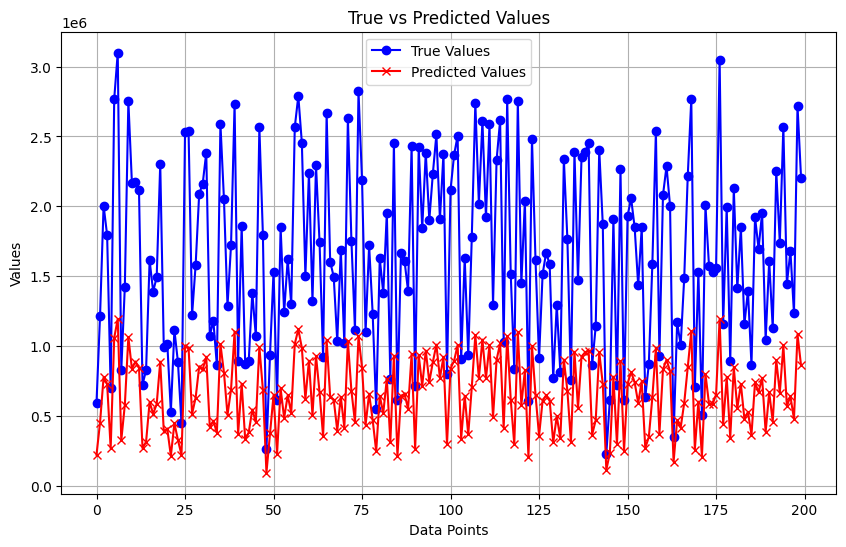

In [115]:
model = LinearRegression()
model.fit(x_train, y_train, epochs=500, learning_rate=0.001, norm=2, threshold=0.0001)
y_pred = model.predict(x_test)
print("MSE loss: ", np.mean((y_pred - y_test) ** 2))

indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()